In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('./project/advertising.csv')
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


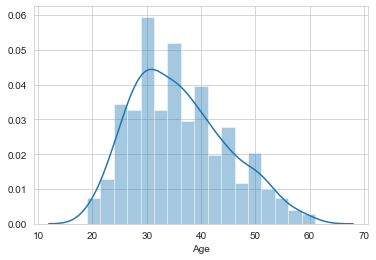

In [4]:
sns.set_style('whitegrid')
sns.distplot(df['Age'])

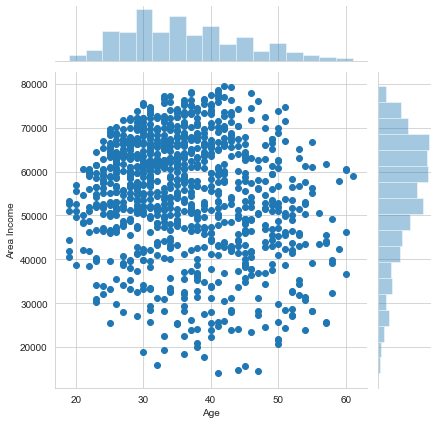

In [5]:
sns.jointplot(df.Age, df['Area Income'])

In [6]:
df['hour'] = df.Timestamp.apply(lambda x:int(x.split()[1][0:2]))

In [7]:
y = df['Clicked on Ad']
x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'hour']]
#x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male']]

x

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,hour
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,1
2,69.47,26,59785.94,236.50,0,20
3,74.15,29,54806.18,245.89,1,2
4,68.37,35,73889.99,225.58,0,3
...,...,...,...,...,...,...
995,72.97,30,71384.57,208.58,1,21
996,51.30,45,67782.17,134.42,1,2
997,51.63,51,42415.72,120.37,1,17
998,55.55,19,41920.79,187.95,0,2


In [8]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train, y_test =  train_test_split(x,y,test_size=0.3)

In [9]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(x_train, y_train)
y_pred = log.predict(x_test)

from sklearn import metrics
acc = metrics.accuracy_score(y_test, y_pred)
print(acc)

0.9066666666666666


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[142,   6],
       [ 22, 130]], dtype=int64)

In [11]:
classification_report(y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.87      0.96      0.91       148\n           1       0.96      0.86      0.90       152\n\n    accuracy                           0.91       300\n   macro avg       0.91      0.91      0.91       300\nweighted avg       0.91      0.91      0.91       300\n'

In [12]:
#x = df[['Daily Time Spent on Site', 'Age', 'Area Income', 'Daily Internet Usage', 'Male', 'hour']]
log.coef_

array([[-7.02903423e-02,  2.61901182e-01, -2.53082595e-05,
        -2.27825191e-02,  8.07583287e-04,  6.64520949e-02]])

In [13]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)
classification_report(y_test, forest.predict(x_test))

'              precision    recall  f1-score   support\n\n           0       0.95      0.97      0.96       148\n           1       0.97      0.95      0.96       152\n\n    accuracy                           0.96       300\n   macro avg       0.96      0.96      0.96       300\nweighted avg       0.96      0.96      0.96       300\n'

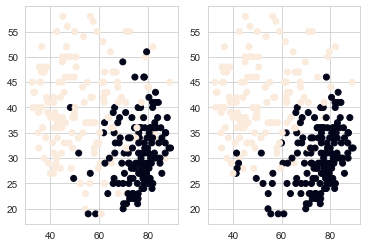

In [18]:
fig, (ax0, ax1) = plt.subplots(1,2)

ax0.scatter(x_test['Daily Time Spent on Site'], x_test['Age'], c=y_test)
ax1.scatter(x_test['Daily Time Spent on Site'], x_test['Age'], c=y_pred)
#ax0.scatter(x_test['hour'], x_test['Age'], c=y_test)
#ax1.scatter(x_test['hour'], x_test['Age'], c=y_pred)

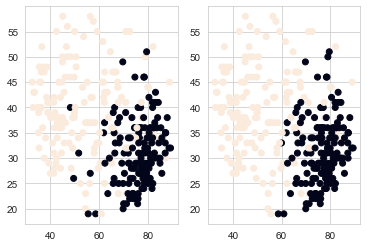

In [15]:
fig, (ax0, ax1) = plt.subplots(1,2)

ax0.scatter(x_test['Daily Time Spent on Site'], x_test['Age'], c=y_test)
ax1.scatter(x_test['Daily Time Spent on Site'], x_test['Age'], c=forest.predict(x_test))

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
hour                        1000 non-null int64
dtypes: float64(3), int64(4), object(4)
memory usage: 86.1+ KB


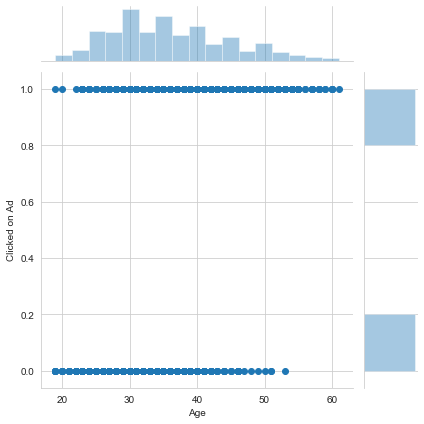

In [19]:
sns.jointplot(df.Age, y)